In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import tensorflow as tf

In [ ]:
pip install tensorflow==2.1.0

     |████████████████████████████████| 421.8MB 29kB/s 
     |████████████████████████████████| 450kB 48.5MB/s 
     |████████████████████████████████| 3.9MB 52.9MB/s 
     |████████████████████████████████| 51kB 8.4MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=ad53a22097b7548adc8f8bd7e56a7feeb13bdde87cda9f62ad33c28de39d9814
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully 

In [ ]:
tf.__version__

'2.1.0'

In [ ]:
test_dir = '/content/drive/My Drive/chest_x-ray/chest_xray/chest_xray/test/'
train_dir = '/content/drive/My Drive/chest_x-ray/chest_xray/chest_xray/train/'
valid_dir =  '/content/drive/My Drive/chest_x-ray/chest_xray/chest_xray/val/'

train_normal_size = len(os.listdir('/content/drive/My Drive/chest_x-ray/chest_xray/chest_xray/train/' + 'NORMAL/'))
train_pneumonia_size = len(os.listdir('/content/drive/My Drive/chest_x-ray/chest_xray/chest_xray/train/' + 'PNEUMONIA/'))

test_normal_size = len(os.listdir('/content/drive/My Drive/chest_x-ray/chest_xray/chest_xray/test/' + 'NORMAL/'))
test_pneumonia_size = len(os.listdir('/content/drive/My Drive/chest_x-ray/chest_xray/chest_xray/test/' + 'PNEUMONIA/'))

val_normal_size = len(os.listdir('/content/drive/My Drive/chest_x-ray/chest_xray/chest_xray/val/' + 'NORMAL/'))
val_pneumonia_size = len(os.listdir('/content/drive/My Drive/chest_x-ray/chest_xray/chest_xray/val/' + 'PNEUMONIA/'))

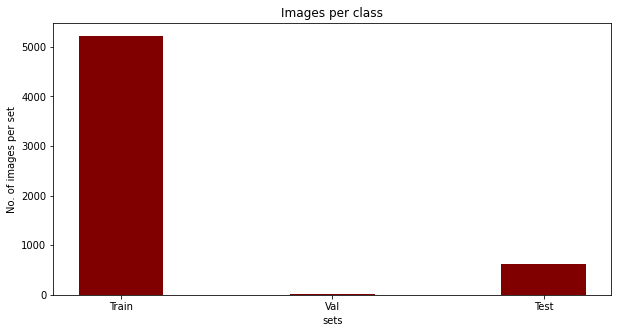

In [ ]:
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(['Train','Val','Test'],[train_normal_size+train_pneumonia_size,val_normal_size+val_pneumonia_size,test_normal_size+test_pneumonia_size], color ='maroon',  
        width = 0.4) 
  
plt.xlabel("sets") 
plt.ylabel("No. of images per set") 
plt.title("Images per class") 
plt.show() 

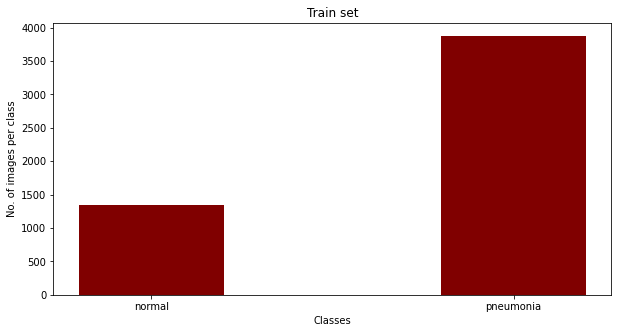

In [ ]:
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(['normal','pneumonia'],[train_normal_size,train_pneumonia_size], color ='maroon',  
        width = 0.4) 
  
plt.xlabel("Classes") 
plt.ylabel("No. of images per class") 
plt.title("Train set") 
plt.show() 

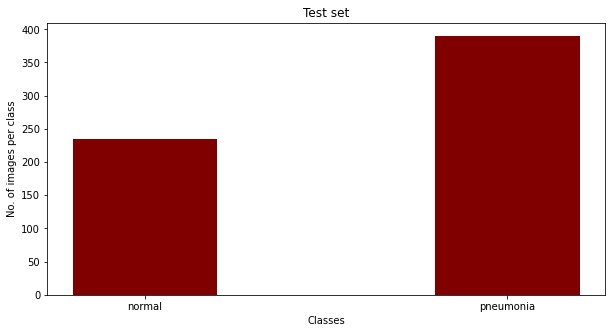

In [ ]:
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(['normal','pneumonia'],[test_normal_size,test_pneumonia_size], color ='maroon',  
        width = 0.4) 
  
plt.xlabel("Classes") 
plt.ylabel("No. of images per class") 
plt.title("Test set") 
plt.show() 

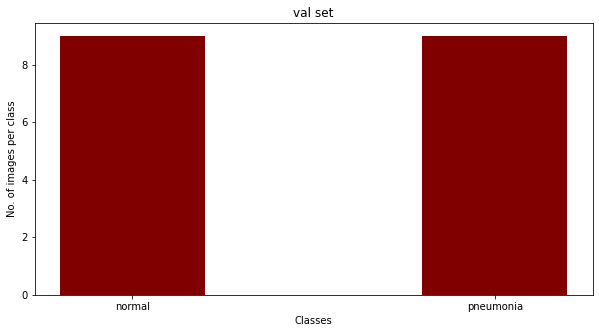

In [ ]:
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(['normal','pneumonia'],[val_normal_size,val_pneumonia_size], color ='maroon',  
        width = 0.4) 
  
plt.xlabel("Classes") 
plt.ylabel("No. of images per class") 
plt.title("val set") 
plt.show() 

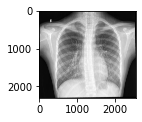

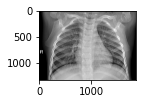

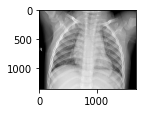

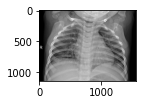

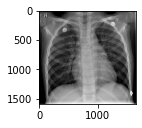

In [ ]:
#view training images
i = 0
for image in os.listdir(train_dir + 'NORMAL/')[0:5]:
  plt.figure(figsize=(10,10))
  plt.subplot(1,5,i+1)
  plt.imshow(cv2.imread(train_dir + 'NORMAL/' + image))
  plt.show()
  i+=1


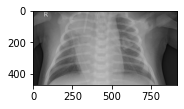

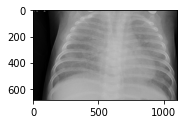

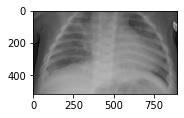

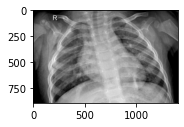

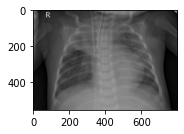

In [ ]:
i = 0
for image in os.listdir(train_dir + 'PNEUMONIA/')[0:5]:
  plt.figure(figsize=(15,15))
  plt.subplot(1,5,i+1)
  plt.imshow(cv2.imread(train_dir + 'PNEUMONIA/' + image))
  plt.show()
  i+=1


In [ ]:
vgg  = tf.keras.applications.VGG19(input_shape=[224,224] + [3], weights='imagenet', include_top=False)

In [ ]:
vgg.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
for layer in vgg.layers:
  layer.trainable = False


In [ ]:
x = tf.keras.layers.Flatten()(vgg.output)
x = tf.keras.layers.Dense(128,activation = 'relu')(x)
x = tf.keras.layers.Dropout(0.4)(x)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# create a model object
model = tf.keras.Model(inputs=vgg.input, outputs=x)

In [ ]:
vgg.input

<tf.Tensor 'input_15:0' shape=(None, 224, 224, 3) dtype=float32>

In [ ]:
model.summary()

Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0  

In [ ]:
preprocess_input = tf.keras.applications.vgg19.preprocess_input

In [ ]:
# Generate batches of tensor image data with real-time data augmentation.

#augmentation steps taken from https://www.kaggle.com/madz2000/pneumonia-detection-using-cnn-92-6-accuracy
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale = 1.0/255.0,
        preprocessing_function = preprocess_input,
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

valid_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0, preprocessing_function = preprocess_input)
test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0, preprocessing_function = preprocess_input)

train_batches = train_gen.flow_from_directory(
    '/content/drive/My Drive/chest_x-ray/chest_xray/chest_xray/train',
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
    class_mode = 'binary', 
    
)

val_batches = valid_gen.flow_from_directory(
    '/content/drive/My Drive/chest_x-ray/chest_xray/chest_xray/val',
    target_size=(224, 224),
    shuffle=True,
    class_mode = 'binary', 
    
)

test_batches = test_gen.flow_from_directory(
    '/content/drive/My Drive/chest_x-ray/chest_xray/chest_xray/test',
    target_size=(224, 224),
    shuffle=True,
    class_mode = 'binary', 
    
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
loss = tf.keras.losses.BinaryCrossentropy()
optim = tf.keras.optimizers.RMSprop()
metrics = ["accuracy"]
model.compile(optimizer=optim, loss=loss, metrics=metrics)

In [ ]:
# Define a Callback class that stops training once accuracy reaches 97.0%
# class myCallback(tf.keras.callbacks.Callback):
#   def on_epoch_end(self, epoch, logs={}):
#     if(logs.get('accuracy')>=0.98):
#       print("\nReached 98.0% accuracy so cancelling training!")
#       self.model.stop_training = True


In [ ]:
# callbacks =myCallback()

In [ ]:
epochs = 15
history = model.fit(train_batches, validation_data=val_batches,
          epochs=epochs, verbose=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 163 steps, validate for 1 steps
Epoch 1/15
163/163 [==============================] - 109s 666ms/step - loss: 0.5474 - accuracy: 0.8407 - val_loss: 1.1250 - val_accuracy: 0.6875
Epoch 2/15
163/163 [==============================] - 107s 659ms/step - loss: 0.2725 - accuracy: 0.8898 - val_loss: 0.4370 - val_accuracy: 0.7500
Epoch 3/15
163/163 [==============================] - 107s 656ms/step - loss: 0.2328 - accuracy: 0.9059 - val_loss: 0.4366 - val_accuracy: 0.8125
Epoch 4/15
163/163 [==============================] - 107s 656ms/step - loss: 0.2144 - accuracy: 0.9189 - val_loss: 0.3530 - val_accuracy: 0.8125
Epoch 5/15
163/163 [==============================] - 106s 653ms/step - loss: 0.2150 - accuracy: 0.9189 - val_loss: 0.3276 - val_accuracy: 0.8750
Epoch 6/15
163/163 [==============================] - 106s 653ms/step - loss: 0.2030 - accuracy: 0.9204 - val_loss: 0.3031 - val_accuracy: 0.8125
Epoch 7/15
163/163 [============

In [ ]:
model.evaluate(test_batches, verbose=1)


  ...
    to  
  ['...']
20/20 [==============================] - 7s 336ms/step - loss: 0.2572 - accuracy: 0.8926


[0.25723275989294053, 0.8926282]

In [ ]:
pred = []
dir = '/content/drive/My Drive/chest_x-ray/chest_xray/chest_xray/test/NORMAL/'
for img in os.listdir(dir):
  test = cv2.imread(dir + img)
  test =test*(1/255.0)
  test = cv2.resize(test,(224,224))
  test = np.expand_dims(test,axis = 0)
  test = model.predict(test)
  pred.append(test[0])
  pred.append(test[0]<=0.5)


In [ ]:
pred

[array([0.0298483], dtype=float32),
 array([ True]),
 array([0.00098485], dtype=float32),
 array([ True]),
 array([0.00832456], dtype=float32),
 array([ True]),
 array([0.00493304], dtype=float32),
 array([ True]),
 array([0.00252167], dtype=float32),
 array([ True]),
 array([0.00137438], dtype=float32),
 array([ True]),
 array([0.00374648], dtype=float32),
 array([ True]),
 array([0.03171484], dtype=float32),
 array([ True]),
 array([0.02211532], dtype=float32),
 array([ True]),
 array([0.01557568], dtype=float32),
 array([ True]),
 array([0.01230012], dtype=float32),
 array([ True]),
 array([0.00193217], dtype=float32),
 array([ True]),
 array([0.02444127], dtype=float32),
 array([ True]),
 array([0.00085037], dtype=float32),
 array([ True]),
 array([0.04660626], dtype=float32),
 array([ True]),
 array([0.00447362], dtype=float32),
 array([ True]),
 array([0.02557971], dtype=float32),
 array([ True]),
 array([0.0096365], dtype=float32),
 array([ True]),
 array([0.00220751], dtype=flo

In [ ]:
if pred[0] == 1:
  print("Person has Pneumonia")
else:
  print("Person is normal")

Person is normal


In [ ]:
model.save('my_model.h5') 

In [ ]:
!cp '/content/my_model.h5' '/content/drive/My Drive/my_model/x_raymodel.h5'